# Intro
Analysis of step data over first 2 months of fitbit usage.

In [382]:
# imports

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpatch
from datetime import datetime


In [383]:
# import data
allStepDF = pd.read_csv('working/allStep.csv', index_col=0)

# convert datatype
allStepDF['date'] = pd.to_datetime(allStepDF['date'], format='%Y-%m-%d')

# add day of week (0 = Monday, 6 = Sunday)
# allStepDF['weekDay'] = pd.date_range(start=allStepDF['date'][0], freq='D', periods=len(allStepDF['date'])).dayofweek
allStepDF['weekDay'] = allStepDF['date'].dt.dayofweek

# preview data and confirm datatypes
print('Data preview: \n' 
        +str(allStepDF.head()) +'\n'
        +'\n'
        'Check datatypes: \n' 
        +str(allStepDF.dtypes))

Data preview: 
        date  steps  weekDay
0 2022-04-21  16273        3
1 2022-04-22   9631        4
2 2022-04-23  10293        5
3 2022-04-24   9349        6
4 2022-04-25  10533        0

Check datatypes: 
date       datetime64[ns]
steps               int64
weekDay             int64
dtype: object


# Plots

## Plot daily data

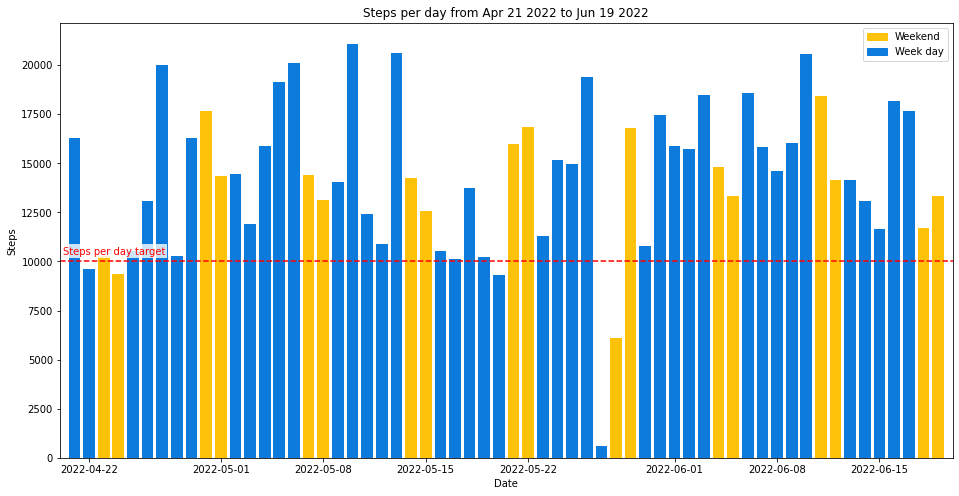

In [384]:
# all days
# create figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# plot steps for all days, weekends coloured yellow. I
colors = ["#FFC20A" if day >= 5 else "#0C7BDC" for day in allStepDF['weekDay']] # colors from https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
plt.bar(allStepDF['date'], allStepDF['steps'], color=colors)

# add line at 10000/day target
ax.axhline(y=10000, color='red', linestyle='--')
ax.annotate('Steps per day target', xy=(0.003, 0.468), xycoords='axes fraction', color='red', bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': 'none', 'pad': 2})


#labels
colors = {"Weekend" : "#FFC20A", "Week day": "#0C7BDC"}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


formattedDates = [x.strftime("%b %d %Y") for x in allStepDF['date']]
plt.title(f'Steps per day from {formattedDates[0]} to {formattedDates[-1]}')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend(handles, labels)
plt.margins(x=0.01) # adjust whitespace between bars and vertical edges

plt.show()

In [385]:
# number of steps per day over target
stepsTarget = 10000

countDaysOverTarget = (allStepDF['steps'] >= stepsTarget).sum()
countDaysUnderTarget = (allStepDF['steps'] < stepsTarget).sum()

totalDays = len(allStepDF['steps'])
actualDaysUnderTarget = allStepDF[allStepDF['steps']<stepsTarget]['date']
actualDaysUnderTargetFormatted = []
for i in range(len(actualDaysUnderTarget)):
    actualDaysUnderTargetFormatted.append(actualDaysUnderTarget.iloc[i].strftime("%b %d"))


print(f'\
Almost all days were over target. \n\
{countDaysOverTarget} / {totalDays} were over target. \n\
{countDaysUnderTarget} / {totalDays} were under target. \n\
The days under target were: {", ".join(str(x) for x in actualDaysUnderTargetFormatted)}.')

Almost all days were over target. 
55 / 60 were over target. 
5 / 60 were under target. 
The days under target were: Apr 22, Apr 24, May 20, May 27, May 28.


In [386]:
# max, min and mean
maxSteps = allStepDF.loc[allStepDF['steps'].idxmax()]
minSteps = allStepDF.loc[allStepDF['steps'].idxmin()]
meanSteps = allStepDF['steps'].mean()
daysOverMean = allStepDF[allStepDF['steps']>meanSteps]['date'].count()

# print
print(f"\
    The highest daily step count was {maxSteps[1]} on {maxSteps[0].strftime('%A %dth %b')} \n\
    The lowest daily step count was {minSteps[1]} on {minSteps[0].strftime('%A %dth %b')} \n\
    The average number of steps was {meanSteps:.0f}, meaning {daysOverMean} / {len(allStepDF)} were above mean.")

    The highest daily step count was 21094 on Tuesday 10th May 
    The lowest daily step count was 598 on Friday 27th May 
    The average number of steps was 14305, meaning 31 / 60 were above mean.


In [387]:
# group by day and play daily averages

# add day name column
# add day of week (0 = Monday, 6 = Sunday)
allStepDF['dayName'] = allStepDF['date'].dt.day_name()

# preview data and confirm datatypes
print('Data preview: \n' 
        +str(allStepDF.head()) +'\n'
        +'\n'
        'Check datatypes: \n' 
        +str(allStepDF.dtypes))

Data preview: 
        date  steps  weekDay   dayName
0 2022-04-21  16273        3  Thursday
1 2022-04-22   9631        4    Friday
2 2022-04-23  10293        5  Saturday
3 2022-04-24   9349        6    Sunday
4 2022-04-25  10533        0    Monday

Check datatypes: 
date       datetime64[ns]
steps               int64
weekDay             int64
dayName            object
dtype: object


## Group and plot means

In [471]:
allStepGroupByDay = allStepDF.groupby('dayName').steps.agg(['count', 'mean']).reset_index()
allStepGroupByDay

,dayName,count,mean
0,Friday,9,14810.222222
1,Monday,8,13051.500000
2,Saturday,9,13741.777778
3,Sunday,9,13766.222222
4,Thursday,9,15122.333333
5,Tuesday,8,14723.750000
6,Wednesday,8,14893.750000


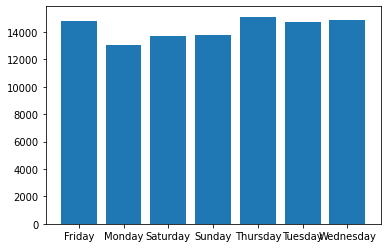

In [472]:
plt.bar(allStepGroupByDay['dayName'], allStepGroupByDay['mean'])
plt.show()

## plot histogram

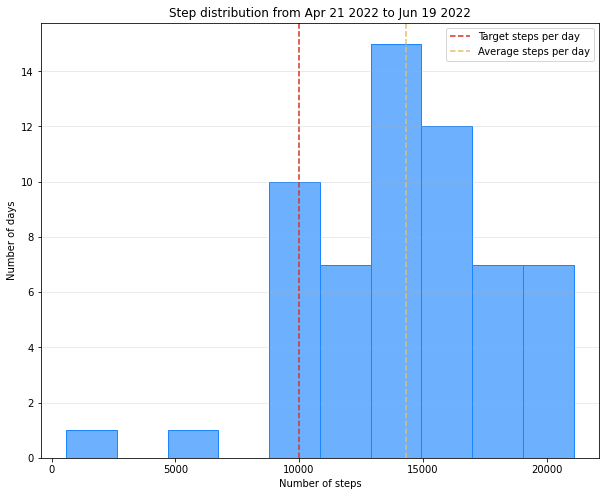

In [451]:
# plot histogram
plt.figure(figsize=(10, 8))
plt.hist(allStepDF.steps, color='#6DB0FD', edgecolor='#1A85FF')

plt.grid(visible=True, which='major', axis='y', alpha=0.3)

plt.axvline(x=10000, color='#DC3220', linestyle='--', linewidth=1.5, label="Target steps per day")
plt.axvline(x=meanSteps, color='#E1BE6A', linestyle='--', linewidth=1.5, label="Average steps per day")

# titles
plt.title(f'Step distribution from {formattedDates[0]} to {formattedDates[-1]}')
plt.xlabel('Number of steps')
plt.ylabel('Number of days')
plt.legend()

plt.show()